## Task 1: Import Libraries and Modules

In [1]:
# Write the code to import the required libraries here.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf



In [2]:
# Write the code to import the required modules here.
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


## Task 2: Load the Datasets

In [10]:
from google.colab import files
uploaded = files.upload()



Saving severity_levels.csv to severity_levels.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


In [11]:
# Write the code to load the datasets here.
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")


In [12]:
# Write the code to print the first five records of training set here.
df_train.head()

,text,category
0,I am still waiting on my card?,card_arrival
1,What can I do if my card still hasn't arrived ...,card_arrival
2,I have been waiting over a week. Is the card s...,card_arrival
3,Can I track my card while it is in the process...,card_arrival
4,"How do I know if I will get my card, or if it ...",card_arrival


In [13]:
# Write the code to print the first five records of test set here.
df_test.head()


,text,category
0,How do I locate my card?,card_arrival
1,"I still have not received my new card, I order...",card_arrival
2,I ordered a card but it has not arrived. Help ...,card_arrival
3,Is there a way to know when my card will arrive?,card_arrival
4,My card has not arrived yet.,card_arrival


## Task 3: Check the Missing Values

In [14]:
# Write the code to check for missing values of training set here.
df_train.isnull().sum()


text        0
category    0
dtype: int64

In [15]:
# Write the code to check for missing values of test set here.

df_test.isnull().sum()

text        0
category    0
dtype: int64

In [16]:
# Write the code to remove the rows with missing values here.
df_train = df_train.dropna()
df_test = df_test.dropna()


## Task 4: Check the Target Balance

In [17]:
# Write the code to check the target balance (dependent variable) here.
unique_values = df_train["category"].unique()
value_counts = df_train["category"].value_counts()
print(unique_values)
print(value_counts)


['card_arrival' 'card_linking' 'exchange_rate'
 'card_payment_wrong_exchange_rate' 'extra_charge_on_statement'
 'pending_cash_withdrawal' 'fiat_currency_support'
 'card_delivery_estimate' 'automatic_top_up' 'card_not_working'
 'exchange_via_app' 'lost_or_stolen_card' 'age_limit' 'pin_blocked'
 'contactless_not_working' 'top_up_by_bank_transfer_charge'
 'pending_top_up' 'cancel_transfer' 'top_up_limits'
 'wrong_amount_of_cash_received' 'card_payment_fee_charged'
 'transfer_not_received_by_recipient' 'supported_cards_and_currencies'
 'getting_virtual_card' 'card_acceptance' 'top_up_reverted'
 'balance_not_updated_after_cheque_or_cash_deposit'
 'card_payment_not_recognised' 'edit_personal_details'
 'why_verify_identity' 'unable_to_verify_identity' 'get_physical_card'
 'visa_or_mastercard' 'topping_up_by_card' 'disposable_card_limits'
 'compromised_card' 'atm_support' 'direct_debit_payment_not_recognised'
 'passcode_forgotten' 'declined_cash_withdrawal' 'pending_card_payment'
 'lost_or_sto

## Task 5: Display the Distribution of Labeled Intents

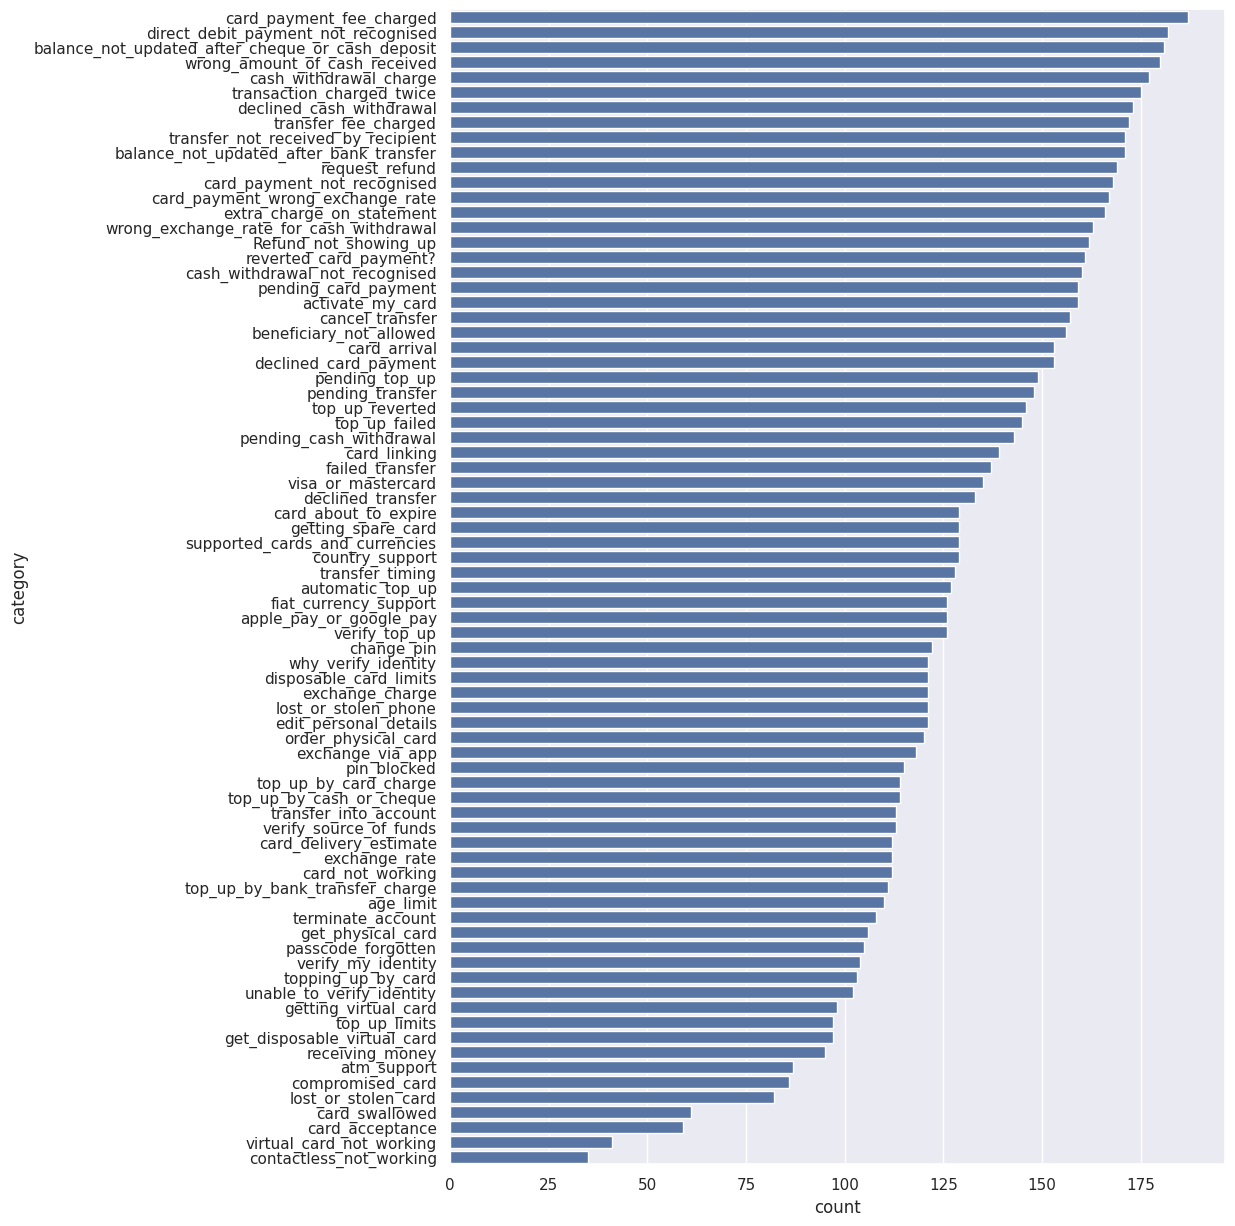

In [18]:
# Write the code to display the distribution here.
sns.set(rc={"figure.figsize":(10, 15)})
sns.countplot(data=df_train, y="category", order=df_train['category'].value_counts().index)
plt.show()


## Task 6: Shuffle the Dataset

In [19]:
# Write the code to shuffle dataset here as some categories may be missing in the validation set.
df_train = df_train.sample(frac = 1)


## Task 7: Transform the Data

In [20]:
# Write the code to transform data here.

train_data = df_train['text'].to_numpy()
test_data = df_test['text'].to_numpy()

## Task 8: Tokenize the Words

In [21]:
# Write the code to set the configuration parameters for tokenization and out-of-vocabulary (OOV) token here.

vocab_size = 5000
oov_tok = '<OOV>'

In [22]:
# Write the code to use TensorFlow’s Tokenizer to convert words to integers here.
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_data)


In [24]:
# Write the code to convert each text into a sequence of integers here.
train_sequences = tokenizer.texts_to_sequences(train_data)
test_sequences = tokenizer.texts_to_sequences(test_data)


## Task 9: Pad the Training and Test Sequences

In [25]:
# Write the code to set the configuration parameter for sequence padding here (to have same lenght and uniform size).
max_length = 50
trunc_type = 'post'
padding_type = 'post'


In [26]:
# Write the code to perform sequence padding here.
x_train = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

x_test = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


## Task 10: Encode the Labels

In [27]:
# Write the code to convert the category column of training and test datasets here.
train_labels = pd.Categorical(df_train['category']).codes
test_labels = pd.Categorical(df_test['category']).codes


In [28]:
# Write the code to reshape the array of encoded labels into a two-dimensional array here.

y_train = train_labels.reshape((10003,1))
y_test = test_labels.reshape((3080,1))

## Task 11: Prepare a Validation Set

In [29]:
# Write the code to prepare validation set here (10% of training set).
partial_x_train = x_train[:9000]
partial_y_train = y_train[:9000]

x_val = x_train[9000:]
y_val = y_train[9000:]


## Task 12: Define a Neural Network Architecture

In [31]:
# Write the code to define neural network architecture using TensorFlow’s Keras API here.The model should have an embedding layer, a bidirectional LSTM layer, and two dense layers.
embedding_dim = 64

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    tf.keras.layers.Dense(77, activation='softmax')
])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          320000    
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               66048     
 onal)                                                           
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 77)                5005      
                                                                 
Total params: 399309 (1.52 MB)
Trainable params: 399309 (1.52 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Task 13: Fit the Model

In [32]:
# Write the code to set the training configuration here. Set the training configurations such as the loss function, optimizer, and evaluation metrics
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [33]:
# Write the code to fit the model with the partial training dataset here.
num_epochs = 20

history = model.fit(partial_x_train, partial_y_train, epochs=num_epochs, validation_data=(x_val, y_val), verbose=2)


Epoch 1/20
282/282 - 18s - loss: 3.7117 - accuracy: 0.0962 - val_loss: 2.7878 - val_accuracy: 0.2084 - 18s/epoch - 65ms/step
Epoch 2/20
282/282 - 5s - loss: 2.1178 - accuracy: 0.3928 - val_loss: 1.7561 - val_accuracy: 0.4995 - 5s/epoch - 16ms/step
Epoch 3/20
282/282 - 3s - loss: 1.3394 - accuracy: 0.6069 - val_loss: 1.2872 - val_accuracy: 0.6510 - 3s/epoch - 12ms/step
Epoch 4/20
282/282 - 2s - loss: 0.9320 - accuracy: 0.7313 - val_loss: 1.1128 - val_accuracy: 0.6889 - 2s/epoch - 8ms/step
Epoch 5/20
282/282 - 3s - loss: 0.6791 - accuracy: 0.8042 - val_loss: 0.9700 - val_accuracy: 0.7368 - 3s/epoch - 9ms/step
Epoch 6/20
282/282 - 3s - loss: 0.5287 - accuracy: 0.8481 - val_loss: 0.9005 - val_accuracy: 0.7498 - 3s/epoch - 9ms/step
Epoch 7/20
282/282 - 2s - loss: 0.4307 - accuracy: 0.8802 - val_loss: 0.8580 - val_accuracy: 0.7697 - 2s/epoch - 9ms/step
Epoch 8/20
282/282 - 2s - loss: 0.3487 - accuracy: 0.8999 - val_loss: 0.8755 - val_accuracy: 0.7846 - 2s/epoch - 8ms/step
Epoch 9/20
282/282 

## Task 14: Plot Training and Validation Loss Curves

In [34]:
# Convert the training history to a pandas DataFrame here.
df_history = pd.DataFrame(history.history)
df_history.rename(columns ={"loss": "train_loss"}, inplace=True)


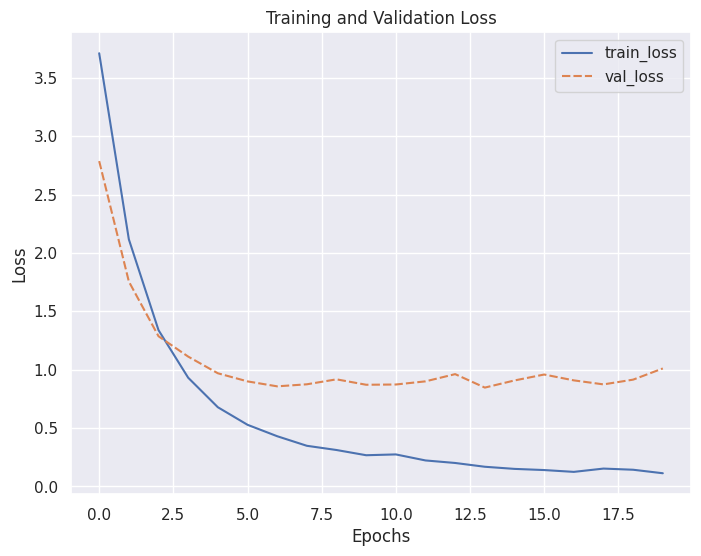

In [35]:
# Plot training and validation loss curves here to visualize the model’s loss value that evolved over training epochs
sns.set(rc={"figure.figsize":(8, 6)})
my_plot = sns.lineplot(data=df_history[["train_loss","val_loss"]])
my_plot.set_xlabel('Epochs')
my_plot.set_ylabel("Loss")
my_plot.set_title("Training and Validation Loss")
plt.show()


## Task 15: Retrain the Model

In [38]:
# Epoch number may differ from your observation as the randomized training data.
num_epochs = 14

model = tf.keras.Sequential([
 tf.keras.layers.Embedding(vocab_size, embedding_dim),
 tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
 tf.keras.layers.Dense(embedding_dim, activation='relu'),
 tf.keras.layers.Dense(77, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=num_epochs, verbose=2)


Epoch 1/14
313/313 - 13s - loss: 3.8055 - accuracy: 0.0689 - 13s/epoch - 40ms/step
Epoch 2/14
313/313 - 3s - loss: 2.2593 - accuracy: 0.3446 - 3s/epoch - 10ms/step
Epoch 3/14
313/313 - 2s - loss: 1.4054 - accuracy: 0.6028 - 2s/epoch - 8ms/step
Epoch 4/14
313/313 - 3s - loss: 0.9586 - accuracy: 0.7253 - 3s/epoch - 8ms/step
Epoch 5/14
313/313 - 2s - loss: 0.6911 - accuracy: 0.8091 - 2s/epoch - 8ms/step
Epoch 6/14
313/313 - 2s - loss: 0.5394 - accuracy: 0.8531 - 2s/epoch - 8ms/step
Epoch 7/14
313/313 - 2s - loss: 0.4494 - accuracy: 0.8753 - 2s/epoch - 8ms/step
Epoch 8/14
313/313 - 2s - loss: 0.3786 - accuracy: 0.8960 - 2s/epoch - 8ms/step
Epoch 9/14
313/313 - 2s - loss: 0.3164 - accuracy: 0.9096 - 2s/epoch - 7ms/step
Epoch 10/14
313/313 - 2s - loss: 0.2706 - accuracy: 0.9208 - 2s/epoch - 7ms/step
Epoch 11/14
313/313 - 2s - loss: 0.2381 - accuracy: 0.9299 - 2s/epoch - 7ms/step
Epoch 12/14
313/313 - 2s - loss: 0.2072 - accuracy: 0.9392 - 2s/epoch - 8ms/step
Epoch 13/14
313/313 - 2s - loss: 

## Task 16: Examine the Model’s Performance with the Test Dataset

In [39]:
# The expected test accuracy should be ~80%.

results = model.evaluate(x_test, y_test)

97/97 [==============================] - 1s 4ms/step - loss: 0.8582 - accuracy: 0.8159


## Task 17: Predict the Outcomes for New Data

In [40]:
# Write the code to convert the query text samples into padded sequences here.

input_text = ["I am still waiting for my card, when will it arrive?",
                    "Which fiat currency do you support?",
                    "Help, I just lost my card!"]

input_text_arr = np.array(input_text)
input_text_sequences = tokenizer.texts_to_sequences(input_text_arr)
input_text_padded = pad_sequences(input_text_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)



In [41]:
# Write the code to use the trained model to predict the outcomes here.
predictions = model.predict(input_text_padded)
predicted_classes = np.argmax(predictions,axis=1)


1/1 [==============================] - 1s 670ms/step


## Task 18: Match Predictions with Severity Levels

In [42]:
# Write the code to convert the prediction to the original category text here.
df_train['category_codes'] = pd.Categorical(df_train['category']).codes
df_ref = df_train[["category", "category_codes"]]
df_ref = df_ref.drop_duplicates()
df_ref = df_ref.reset_index(drop=True)

predicted_categories = []

for x in predicted_classes:
  target_code = x
  category = df_ref[df_ref["category_codes"] == target_code]["category"].values[0]
  predicted_categories.append(category)


In [44]:
# Write the code to match each prediction to the corresponding severity level here.

df_severity = pd.read_csv("severity_levels.csv")

for y in predicted_categories:
  target_index = df_severity [df_severity ["category"]==y].index.values[0]
  level = df_severity._get_value(target_index, 'severity_level')
  print("Predicted Category: " + y)
  print("Severity Level: " + level )
  print("\n")

Predicted Category: card_delivery_estimate
Severity Level: Medium


Predicted Category: fiat_currency_support
Severity Level: Low


Predicted Category: lost_or_stolen_card
Severity Level: High


